In [63]:
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [64]:
response = requests.get('https://en.wikipedia.org/wiki/Zones_of_Milan').text
soup = BeautifulSoup(response,'lxml')
table = soup.find('table', {'class':'wikitable sortable'})

In [65]:
table_rows = table.find_all('tr')

res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)


df = pd.DataFrame(res, columns=["Townhall", "Description", "Area", "Population","Density", "Districts"])
df

,Townhall,Description,Area,Population,Density,Districts
0,1,Centro storico,9.67,"96,315","11,074","Brera, Centro Storico, Conca del Naviglio, Gua..."
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031","Adriano, Crescenzago, Gorla, Greco, Loreto, Ma..."
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785","Casoretto, Cimiano, Città Studi, Dosso, Lambra..."
3,4,"Porta Vittoria, Forlanini",20.95,156.369,"8,069","Acquabella, Calvairate, Castagnedo, Cavriano, ..."
4,5,"Vigentino, Chiaravalle, Gratosoglio",29.87,"123,779","4,487","Basmetto, Cantalupa, Case Nuove, Chiaravalle, ..."
5,6,"Barona, Lorenteggio",18.28,"149,000","8,998","Arzaga, Barona, Boffalora, Cascina Bianca, Con..."
6,7,"Baggio, De Angeli, San Siro",31.34,"170,814","6,093","Assiano, Baggio, Figino, Fopponino, Forze Arma..."
7,8,"Fiera, Gallaratese, Quarto Oggiaro",23.72,"181,669","8,326","Boldinasco, Bullona, Cagnola, Campo dei Fiori,..."
8,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204","Affori, Bicocca, Bovisa, Bovisasca, Bruzzano, ..."


In [66]:
df_Townhall = df.drop(columns=['Districts'])
df_Townhall

,Townhall,Description,Area,Population,Density
0,1,Centro storico,9.67,"96,315","11,074"
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031"
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785"
3,4,"Porta Vittoria, Forlanini",20.95,156.369,"8,069"
4,5,"Vigentino, Chiaravalle, Gratosoglio",29.87,"123,779","4,487"
5,6,"Barona, Lorenteggio",18.28,"149,000","8,998"
6,7,"Baggio, De Angeli, San Siro",31.34,"170,814","6,093"
7,8,"Fiera, Gallaratese, Quarto Oggiaro",23.72,"181,669","8,326"
8,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204"


In [67]:
df_Townhall['Name'] = df_Townhall.Description.str.split(',').str[0]
df_Townhall['Name'] = df_Townhall.Name.str.capitalize()
df_Townhall

,Townhall,Description,Area,Population,Density,Name
0,1,Centro storico,9.67,"96,315","11,074",Centro storico
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031",Stazione centrale
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785",Città studi
3,4,"Porta Vittoria, Forlanini",20.95,156.369,"8,069",Porta vittoria
4,5,"Vigentino, Chiaravalle, Gratosoglio",29.87,"123,779","4,487",Vigentino
5,6,"Barona, Lorenteggio",18.28,"149,000","8,998",Barona
6,7,"Baggio, De Angeli, San Siro",31.34,"170,814","6,093",Baggio
7,8,"Fiera, Gallaratese, Quarto Oggiaro",23.72,"181,669","8,326",Fiera
8,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204",Porta garibaldi


In [68]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Milano, MI, Lom, Italia")
address = []
coord = []
address = "Municipio "+ df['Townhall']+", Milano, MI, Lom, Italy"
coord = address.apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df_Townhall['Coordinates'] = coord
df_Townhall

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


,Townhall,Description,Area,Population,Density,Name,Coordinates
0,1,Centro storico,9.67,"96,315","11,074",Centro storico,"(45.467280599999995, 9.185962010120925)"
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031",Stazione centrale,"(45.4999899, 9.218998626052084)"
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785",Città studi,"(45.489799500000004, 9.241030886135526)"
3,4,"Porta Vittoria, Forlanini",20.95,156.369,"8,069",Porta vittoria,"(45.446205, 9.239343264566283)"
4,5,"Vigentino, Chiaravalle, Gratosoglio",29.87,"123,779","4,487",Vigentino,"(45.4198458, 9.198152549352766)"
5,6,"Barona, Lorenteggio",18.28,"149,000","8,998",Barona,"(45.43792895, 9.145648151241897)"
6,7,"Baggio, De Angeli, San Siro",31.34,"170,814","6,093",Baggio,"(45.469598000000005, 9.114757320322848)"
7,8,"Fiera, Gallaratese, Quarto Oggiaro",23.72,"181,669","8,326",Fiera,"(45.50001535, 9.122774225147062)"
8,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204",Porta garibaldi,"(45.5077041, 9.17941004494827)"


In [69]:
df_Townhall[['Latitude', 'Longitude']] = df_Townhall['Coordinates'].apply(pd.Series)


In [70]:
df_Townhall = df_Townhall.drop(columns=['Coordinates'])


In [73]:
df_Townhall


,Townhall,Description,Area,Population,Density,Name,Latitude,Longitude
0,1,Centro storico,9.67,"96,315","11,074",Centro storico,45.467281,9.185962
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031",Stazione centrale,45.499990,9.218999
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785",Città studi,45.489800,9.241031
3,4,"Porta Vittoria, Forlanini",20.95,156.369,"8,069",Porta vittoria,45.446205,9.239343
4,5,"Vigentino, Chiaravalle, Gratosoglio",29.87,"123,779","4,487",Vigentino,45.419846,9.198153
5,6,"Barona, Lorenteggio",18.28,"149,000","8,998",Barona,45.437929,9.145648
6,7,"Baggio, De Angeli, San Siro",31.34,"170,814","6,093",Baggio,45.469598,9.114757
7,8,"Fiera, Gallaratese, Quarto Oggiaro",23.72,"181,669","8,326",Fiera,45.500015,9.122774
8,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204",Porta garibaldi,45.507704,9.179410


In [75]:
df_top_townhall = df_Townhall.loc[df_Townhall['Name'].isin(["Centro storico", "Stazione centrale", "Città studi", "Porta garibaldi", "Porta vittoria", "Vigentino","Fiera","Barona","Baggio"])]
#df_top_townhall = df_Townhall.loc[df_Townhall['Name'].isin(["Centro storico", "Stazione centrale", "Città studi", "Porta garibaldi", "Porta vittoria"])]


In [76]:
df_top_townhall = df_top_townhall.reset_index(drop=True)
df_top_townhall 

,Townhall,Description,Area,Population,Density,Name,Latitude,Longitude
0,1,Centro storico,9.67,"96,315","11,074",Centro storico,45.467281,9.185962
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031",Stazione centrale,45.499990,9.218999
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785",Città studi,45.489800,9.241031
3,4,"Porta Vittoria, Forlanini",20.95,156.369,"8,069",Porta vittoria,45.446205,9.239343
4,5,"Vigentino, Chiaravalle, Gratosoglio",29.87,"123,779","4,487",Vigentino,45.419846,9.198153
5,6,"Barona, Lorenteggio",18.28,"149,000","8,998",Barona,45.437929,9.145648
6,7,"Baggio, De Angeli, San Siro",31.34,"170,814","6,093",Baggio,45.469598,9.114757
7,8,"Fiera, Gallaratese, Quarto Oggiaro",23.72,"181,669","8,326",Fiera,45.500015,9.122774
8,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204",Porta garibaldi,45.507704,9.179410


In [77]:
response2 = requests.get('https://www.mercato-immobiliare.info/lombardia/milano/milano.html').text
soup2 = BeautifulSoup(response2, 'html.parser')
table2 = soup2.find('table', {'id':'childrentable'})

In [78]:
table_rows2 = table2.find_all('tr')

res = []
for tr in table_rows2:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)


df_price = pd.DataFrame(res, columns=["Name", "Price","Link"])
df_price = df_price.drop(columns=['Link'])

In [79]:
df_price['Name'] = df_price.Name.str.capitalize()


In [80]:
df_price


,Name,Price
0,Adriano,€ 2.750 /m²
1,Affori,€ 2.350 /m²
2,Baggio,€ 2.400 /m²
3,Barona,€ 3.200 /m²
4,Bicocca,€ 3.050 /m²
5,Bocconi,€ 5.300 /m²
6,Bovisa,€ 2.550 /m²
7,Bovisasca,€ 2.000 /m²
8,Brera,€ 7.600 /m²
9,Bruzzano,€ 2.100 /m²


In [81]:
#df_price = df_price.loc[df_price['Name'].isin(["Centro storico", "Stazione centrale", "Città studi", "Porta garibaldi", "Porta vittoria", "Vigentino"])]
df_price = df_price.loc[df_price['Name'].isin(["Centro storico", "Stazione centrale", "Città studi", "Porta garibaldi", "Porta vittoria", "Vigentino","Fiera","Barona","Baggio"])]
df_price = df_price.reset_index(drop=True)
df_price

,Name,Price
0,Baggio,€ 2.400 /m²
1,Barona,€ 3.200 /m²
2,Centro storico,€ 7.100 /m²
3,Città studi,€ 4.500 /m²
4,Porta garibaldi,€ 6.800 /m²
5,Porta vittoria,€ 6.450 /m²
6,Stazione centrale,€ 5.000 /m²
7,Vigentino,€ 3.250 /m²


In [82]:
df_top_townhall = pd.merge(df_top_townhall, df_price, on='Name', how='inner')


In [83]:
df_top_townhall

,Townhall,Description,Area,Population,Density,Name,Latitude,Longitude,Price
0,1,Centro storico,9.67,"96,315","11,074",Centro storico,45.467281,9.185962,€ 7.100 /m²
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031",Stazione centrale,45.499990,9.218999,€ 5.000 /m²
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785",Città studi,45.489800,9.241031,€ 4.500 /m²
3,4,"Porta Vittoria, Forlanini",20.95,156.369,"8,069",Porta vittoria,45.446205,9.239343,€ 6.450 /m²
4,5,"Vigentino, Chiaravalle, Gratosoglio",29.87,"123,779","4,487",Vigentino,45.419846,9.198153,€ 3.250 /m²
5,6,"Barona, Lorenteggio",18.28,"149,000","8,998",Barona,45.437929,9.145648,€ 3.200 /m²
6,7,"Baggio, De Angeli, San Siro",31.34,"170,814","6,093",Baggio,45.469598,9.114757,€ 2.400 /m²
7,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204",Porta garibaldi,45.507704,9.179410,€ 6.800 /m²


In [84]:
CLIENT_ID = 'TM3SILTIA0FQTOSSRL2RDH5JQ4SBIURAHI0BGKGV4FWYCQ2M'
CLIENT_SECRET = 'UDGGMOMYUBWKY5G3ILU2V5ZFWN3LXBMKICEVYBEMFQY5TUAW'
VERSION = '20190325'

In [85]:
radius = 2500
LIMIT = 500

def getNearbyVenues(names, latitudes, longitudes, radius=2500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [88]:
Milan_Venues = getNearbyVenues(names=df_top_townhall['Name'],
                                   latitudes=df_top_townhall['Latitude'],
                                   longitudes=df_top_townhall['Longitude']
                                  )

Centro storico
Stazione centrale
Città studi
Porta vittoria
Vigentino
Barona
Baggio
Porta garibaldi


In [89]:
print ("Shape of the Venues Dataframe: ", Milan_Venues.shape)
Milan_Venues.head(100)

Shape of the Venues Dataframe:  (746, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Centro storico,45.467281,9.185962,Starbucks Reserve Roastery,45.464920,9.186153,Coffee Shop
1,Centro storico,45.467281,9.185962,Gallerie d'Italia,45.467183,9.190056,Art Gallery
2,Centro storico,45.467281,9.185962,Galleria Vittorio Emanuele II,45.465577,9.190024,Monument / Landmark
3,Centro storico,45.467281,9.185962,Signorvino,45.467153,9.183460,Wine Bar
4,Centro storico,45.467281,9.185962,Teatro alla Scala,45.467027,9.189686,Opera House
5,Centro storico,45.467281,9.185962,Park Hyatt Milan,45.465532,9.188911,Hotel
6,Centro storico,45.467281,9.185962,Bulgari Lounge Bar,45.470014,9.188943,Cocktail Bar
7,Centro storico,45.467281,9.185962,Room Mate Giulia Hotel,45.465250,9.189396,Hotel
8,Centro storico,45.467281,9.185962,Giovanni Cova & C.,45.468816,9.184121,Bakery
9,Centro storico,45.467281,9.185962,Piazza Castello,45.468965,9.181312,Plaza


In [90]:
print('unique categories: {}'.format(len(Milan_Venues['Venue_Category'].unique())))
print (Milan_Venues['Venue_Category'].value_counts())

unique categories: 159
Italian Restaurant               78
Pizza Place                      52
Café                             31
Supermarket                      29
Hotel                            24
Ice Cream Shop                   22
Park                             22
Restaurant                       20
Plaza                            17
Chinese Restaurant               17
Bakery                           17
Dessert Shop                     16
Japanese Restaurant              13
Cocktail Bar                     13
Pub                              12
Tram Station                     11
Seafood Restaurant               11
Trattoria/Osteria                11
Sushi Restaurant                 11
Art Gallery                      10
Gym                              10
Wine Bar                          9
Theater                           9
Soccer Field                      8
Boutique                          7
Asian Restaurant                  6
Gym / Fitness Center              6
Night

In [91]:
# Create a Data-Frame out of it to Concentrate Only on sweet Place
Milan_sweet = Milan_Venues[Milan_Venues['Venue_Category'].str.contains('Coffee|Ice Cream|Chocolate|Cupcake|Pastry|Dessert|Pastry')].reset_index(drop=True)
Milan_sweet.index = np.arange(1, len(Milan_sweet)+1)
print ('Shape of the Data-Frame with Venue Category Cafe: ', Milan_sweet.shape)
Milan_sweet.head(1000)

Shape of the Data-Frame with Venue Category Cafe:  (49, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Centro storico,45.467281,9.185962,Starbucks Reserve Roastery,45.464920,9.186153,Coffee Shop
2,Centro storico,45.467281,9.185962,Ciacco. Gelato senz'altro,45.463704,9.186796,Ice Cream Shop
3,Centro storico,45.467281,9.185962,Gay Odin,45.466187,9.180801,Chocolate Shop
4,Centro storico,45.467281,9.185962,Di Viole Di Liquirizia,45.471460,9.185336,Cupcake Shop
5,Centro storico,45.467281,9.185962,Pasticceria Marchesi,45.465612,9.190091,Pastry Shop
6,Centro storico,45.467281,9.185962,Lavazza Coffee Design,45.466274,9.190975,Coffee Shop
7,Centro storico,45.467281,9.185962,Pasticceria Marchesi,45.468299,9.195018,Dessert Shop
8,Centro storico,45.467281,9.185962,Cova,45.468170,9.195347,Dessert Shop
9,Centro storico,45.467281,9.185962,Garibaldi Crème,45.474355,9.183466,Ice Cream Shop
10,Centro storico,45.467281,9.185962,Chocolat,45.467660,9.174160,Ice Cream Shop


In [92]:

!pip install folium

import folium

In [93]:
#get coordinates of Milan
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="milan_locator")
location = geolocator.geocode("Milano, MI, Lom, Italia")
print(location.address)
                              
latitude = location.latitude
longitude = location.longitude
                              
print(latitude)
print(longitude)

Milano, Lombardia, Italia
45.4668
9.1905


In [94]:
Townhall = df_top_townhall.Name
Townhall

0       Centro storico
1    Stazione centrale
2          Città studi
3       Porta vittoria
4            Vigentino
5               Barona
6               Baggio
7      Porta garibaldi
Name: Name, dtype: object

In [96]:
## Show in Map the Top Rated Cafe in the Top 4 Municipalties

map_sweet = folium.Map(location=[latitude, longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Municipalities
#Townhall = ['Centro storico', 'Stazione centrale', 'Porta garibaldi', 'Città studi', 'Porta vittoria','Vigentino']

Townhall = ["Centro storico", "Stazione centrale", "Città studi", "Porta garibaldi", "Porta vittoria", "Vigentino","Fiera","Barona","Baggio"]

x = np.arange(len(Townhall))

#rainbow = ['#0000FF', '#FF0080','#FF8040','#FFFF00' ,'#FF0000', '#00FF00']
rainbow = ['#0000FF', '#FF0080','#FF8040','#FFFF00' ,'#FF0000', '#00FF00','#800080','#408080','#800000']

# add markers to the map
markers_colors = []
for lat, lon, poi, distr in zip(Milan_sweet['Venue_Lat'], 
                                  Milan_sweet['Venue_Long'], 
                                  Milan_sweet['Venue_Category'], 
                                  Milan_sweet['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Townhall.index(distr)-1],
        fill=True,
        fill_color=rainbow[Townhall.index(distr)-1],
        fill_opacity=0.3).add_to(map_sweet)
       
map_sweet

In [97]:
# create a dataframe to calculate the number of cafes for each district
Milan_sweet_by_district = Milan_sweet['District'].value_counts()[0:10].to_frame(name='frequency')
Milan_sweet_by_district=Milan_sweet_by_district.reset_index()

Milan_sweet_by_district.rename(index=str, columns={"index": "Name", "frequency": "Count"}, inplace=True)
Milan_sweet_by_district

,Name,Count
0,Stazione centrale,11
1,Centro storico,11
2,Città studi,10
3,Baggio,5
4,Porta garibaldi,5
5,Vigentino,3
6,Barona,2
7,Porta vittoria,2


In [98]:
df_top_townhall = pd.merge(df_top_townhall, Milan_sweet_by_district, on='Name', how='inner')


In [99]:
df_top_townhall

,Townhall,Description,Area,Population,Density,Name,Latitude,Longitude,Price,Count
0,1,Centro storico,9.67,"96,315","11,074",Centro storico,45.467281,9.185962,€ 7.100 /m²,11
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153.109,"13,031",Stazione centrale,45.499990,9.218999,€ 5.000 /m²,11
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,"141,229","10,785",Città studi,45.489800,9.241031,€ 4.500 /m²,10
3,4,"Porta Vittoria, Forlanini",20.95,156.369,"8,069",Porta vittoria,45.446205,9.239343,€ 6.450 /m²,2
4,5,"Vigentino, Chiaravalle, Gratosoglio",29.87,"123,779","4,487",Vigentino,45.419846,9.198153,€ 3.250 /m²,3
5,6,"Barona, Lorenteggio",18.28,"149,000","8,998",Barona,45.437929,9.145648,€ 3.200 /m²,2
6,7,"Baggio, De Angeli, San Siro",31.34,"170,814","6,093",Baggio,45.469598,9.114757,€ 2.400 /m²,5
7,9,"Porta Garibaldi, Niguarda",21.12,"181,598","9,204",Porta garibaldi,45.507704,9.179410,€ 6.800 /m²,5


In [100]:
df_top_townhall['Population'] = df_top_townhall['Population'].str.replace(',', '')
df_top_townhall['Population'] = df_top_townhall['Population'].str.replace('.', '')
df_top_townhall['Density'] = df_top_townhall['Density'].str.replace(',', '')

In [101]:
df_top_townhall['Area'] = df_top_townhall['Area'].astype(float)
df_top_townhall['Population'] = df_top_townhall['Population'].astype(float)
df_top_townhall['Density'] = df_top_townhall['Density'].astype(float)

df_top_townhall

,Townhall,Description,Area,Population,Density,Name,Latitude,Longitude,Price,Count
0,1,Centro storico,9.67,96315.0,11074.0,Centro storico,45.467281,9.185962,€ 7.100 /m²,11
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153109.0,13031.0,Stazione centrale,45.499990,9.218999,€ 5.000 /m²,11
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,141229.0,10785.0,Città studi,45.489800,9.241031,€ 4.500 /m²,10
3,4,"Porta Vittoria, Forlanini",20.95,156369.0,8069.0,Porta vittoria,45.446205,9.239343,€ 6.450 /m²,2
4,5,"Vigentino, Chiaravalle, Gratosoglio",29.87,123779.0,4487.0,Vigentino,45.419846,9.198153,€ 3.250 /m²,3
5,6,"Barona, Lorenteggio",18.28,149000.0,8998.0,Barona,45.437929,9.145648,€ 3.200 /m²,2
6,7,"Baggio, De Angeli, San Siro",31.34,170814.0,6093.0,Baggio,45.469598,9.114757,€ 2.400 /m²,5
7,9,"Porta Garibaldi, Niguarda",21.12,181598.0,9204.0,Porta garibaldi,45.507704,9.179410,€ 6.800 /m²,5


In [102]:
df_top_townhall['PopulationByVenue'] = df_top_townhall['Population']/df_top_townhall['Count']


In [103]:
df_top_townhall


,Townhall,Description,Area,Population,Density,Name,Latitude,Longitude,Price,Count,PopulationByVenue
0,1,Centro storico,9.67,96315.0,11074.0,Centro storico,45.467281,9.185962,€ 7.100 /m²,11,8755.909091
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",12.58,153109.0,13031.0,Stazione centrale,45.499990,9.218999,€ 5.000 /m²,11,13919.000000
2,3,"Città Studi, Lambrate, Porta Venezia",14.23,141229.0,10785.0,Città studi,45.489800,9.241031,€ 4.500 /m²,10,14122.900000
3,4,"Porta Vittoria, Forlanini",20.95,156369.0,8069.0,Porta vittoria,45.446205,9.239343,€ 6.450 /m²,2,78184.500000
4,5,"Vigentino, Chiaravalle, Gratosoglio",29.87,123779.0,4487.0,Vigentino,45.419846,9.198153,€ 3.250 /m²,3,41259.666667
5,6,"Barona, Lorenteggio",18.28,149000.0,8998.0,Barona,45.437929,9.145648,€ 3.200 /m²,2,74500.000000
6,7,"Baggio, De Angeli, San Siro",31.34,170814.0,6093.0,Baggio,45.469598,9.114757,€ 2.400 /m²,5,34162.800000
7,9,"Porta Garibaldi, Niguarda",21.12,181598.0,9204.0,Porta garibaldi,45.507704,9.179410,€ 6.800 /m²,5,36319.600000


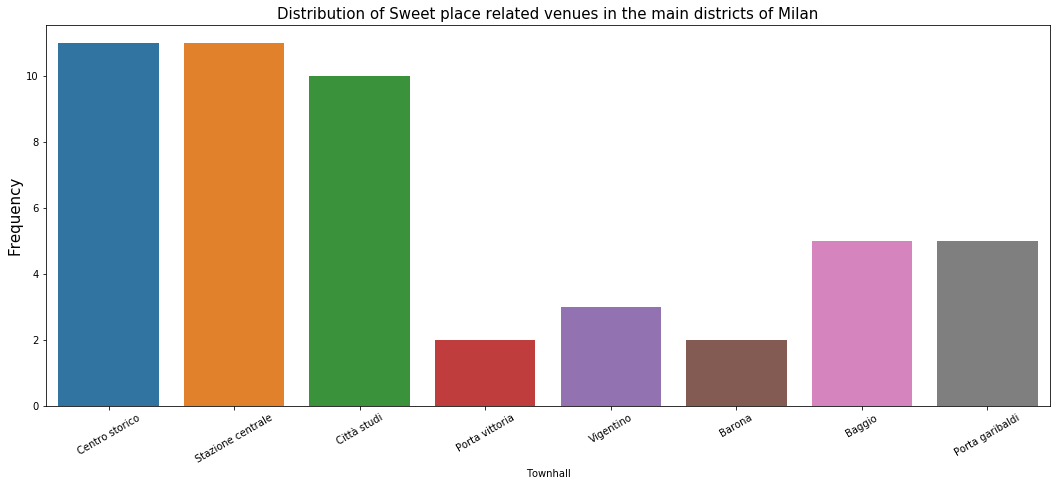

In [105]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Name", y="Count", data=df_top_townhall)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Distribution of Sweet place related venues in the main districts of Milan', fontsize=15)
plt.xlabel('Townhall')
plt.ylabel ('Frequency', fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

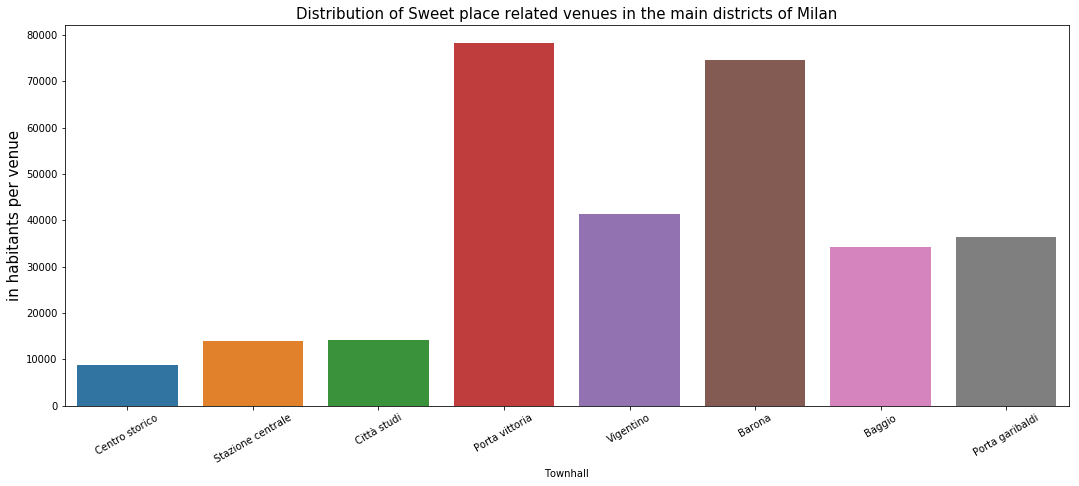

In [106]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Name", y="PopulationByVenue", data=df_top_townhall)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Distribution of Sweet place related venues in the main districts of Milan', fontsize=15)
plt.xlabel('Townhall')
plt.ylabel ('in habitants per venue', fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [107]:
# create a dataframe of top 10 categories
Milan_Venues_Top = Milan_Pizza[['District','Venue_Category']]
Milan_Venues_Top = Milan_Venues_Top.groupby(['District','Venue_Category']).size().to_frame('count').reset_index()


Milan_Venues_Top

,District,Venue_Category,count
0,Centro storico,Chocolate Shop,1
1,Centro storico,Coffee Shop,2
2,Centro storico,Cupcake Shop,1
3,Centro storico,Dessert Shop,3
4,Centro storico,Ice Cream Shop,3
5,Centro storico,Pastry Shop,1
6,Città studi,Coffee Shop,1
7,Città studi,Cupcake Shop,1
8,Città studi,Dessert Shop,5
9,Città studi,Ice Cream Shop,3


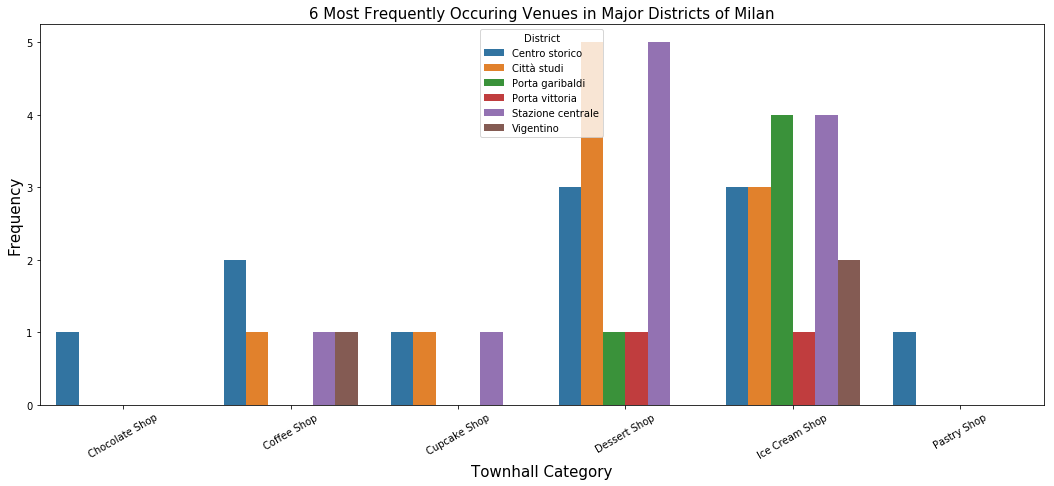

In [108]:

import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x='Venue_Category', y='count', hue='District', data=Milan_Venues_Top)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('6 Most Frequently Occuring Venues in Major Districts of Milan', fontsize=15)
plt.xlabel("Townhall Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()